In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\users\xiaolinzi\miniconda3\envs\py36_ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
# 加载数据
df = pd.read_table('ex2data1.txt',sep=',',names=['X1','X2','y'])
print(df)

           X1         X2  y
0   34.623660  78.024693  0
1   30.286711  43.894998  0
2   35.847409  72.902198  0
3   60.182599  86.308552  1
4   79.032736  75.344376  1
..        ...        ... ..
95  83.489163  48.380286  1
96  42.261701  87.103851  1
97  99.315009  68.775409  1
98  55.340018  64.931938  1
99  74.775893  89.529813  1

[100 rows x 3 columns]


In [7]:
# 分离输入和输出
y = np.array(df['y'])
X1 = np.array(df['X1'])
X2 = np.array(df['X2'])

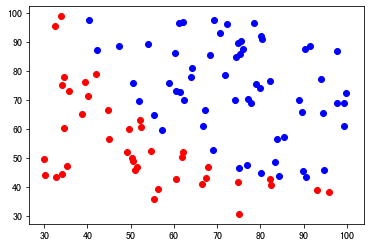

In [9]:
# 可视化分布情况
plt.scatter(X1[y==0],X2[y==0],color='r')
plt.scatter(X1[y==1],X2[y==1],color='b')
plt.show()

In [50]:
# 采用梯度下降法实现逻辑回归
def h(theta,X):
    return 1 / (1 + np.exp(-1 * X.dot(theta)))

# cost function
def J(theta,X,y):
    return np.sum(-1 * y * np.log(h(theta,X)) - (1 - y) * np.log(h(theta,X))) / len(X)

# 求偏导
def dJ(theta,X,y):
    return ((h(theta,X) - y).T.dot(X)) / len(X)

def gradient_descent(initial_theta, X, y,learning_rate=0.01,n_iters=1e4,epsilon=1e-8):
    i_iter = 0
    theta = initial_theta.copy()
    while i_iter < n_iters:
        gradient = dJ(theta, X, y)
        last_theta = theta
        theta = theta - learning_rate * gradient
        if abs(J(theta, X, y) - J(last_theta, X, y)) < epsilon:
            break
        i_iter += 1
    return theta

In [45]:
X = np.hstack([X1.reshape(len(X1),-1),X2.reshape(len(X2),-1)])
X_train = np.hstack([np.ones((len(X),1)),X])
print(X_train.shape)
initial_theta = np.zeros(X_train.shape[1])

res = gradient_descent(initial_theta,X_train,y)
print(res)

(100, 3)
[-7.65900397  0.41024768 -0.05324509]


In [46]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X,y)
print(logistic_model.intercept_,logistic_model.coef_)

[-25.05219314] [[0.20535491 0.2005838 ]]


In [57]:
from logistic_regression import MyLogisticRegression

my_model = MyLogisticRegression()
theta = my_model.fit_gd(X,y)
print(theta)

[-7.65900397  0.41024768 -0.05324509]
